<a href="https://colab.research.google.com/github/17092003vamsi/213ECE3317/blob/main/213ECE3317.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1.B.TRAIN AND EVALUATE
#9921005149
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2641 - accuracy: 0.9218 - val_loss: 0.1252 - val_accuracy: 0.9629
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1105 - accuracy: 0.9666 - val_loss: 0.0976 - val_accuracy: 0.9683
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0759 - accuracy: 0.9772 - val_loss: 0.1167 - val_accuracy: 0.9644
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0583 - accuracy: 0.9816 - val_loss: 0.0909 - val_accuracy: 0.9729
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0853 - accuracy: 0.9745
Test accuracy: 0.9745


In [2]:
#2.BINARY CLASSIFICATION
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(42)
X = np.random.rand(1000, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential([Input(shape=(2)),Dense(64, activation='relu'),Dense(1, activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/10
20/20 [==============================] - 3s 39ms/step - loss: 0.6715 - accuracy: 0.5437 - val_loss: 0.6491 - val_accuracy: 0.6000
Epoch 2/10
20/20 [==============================] - 0s 6ms/step - loss: 0.6547 - accuracy: 0.5406 - val_loss: 0.6285 - val_accuracy: 0.6062
Epoch 3/10
20/20 [==============================] - 0s 9ms/step - loss: 0.6377 - accuracy: 0.5734 - val_loss: 0.6085 - val_accuracy: 0.6375
Epoch 4/10
20/20 [==============================] - 0s 12ms/step - loss: 0.6203 - accuracy: 0.6203 - val_loss: 0.5897 - val_accuracy: 0.6625
Epoch 5/10
20/20 [==============================] - 0s 8ms/step - loss: 0.6017 - accuracy: 0.6641 - val_loss: 0.5711 - val_accuracy: 0.6938
Epoch 6/10
20/20 [==============================] - 0s 16ms/step - loss: 0.5823 - accuracy: 0.7234 - val_loss: 0.5523 - val_accuracy: 0.7250
Epoch 7/10
20/20 [==============================] - 0s 8ms/step - loss: 0.5612 - accuracy: 0.7500 - val_loss: 0.5313 - val_accuracy: 0.7750
Epoch 8/10
20/20 

Estimated coefficients: 
b_0)=1.2363636363636363\ nb_1= 1.1696969696969697


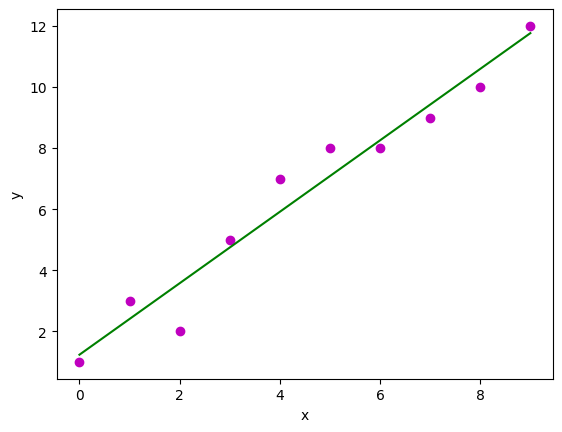

In [3]:
#4.Regression
import numpy as np
import matplotlib.pyplot as plt
def estimate_coef(x, y):
  n = np.size(x)
  m_x= np.mean(x)
  m_y=np.mean(y)
  SS_xy =np.sum(y*x)-n*m_y*m_x
  SS_xx =np.sum(x*x)-n*m_x*m_x
  b_1 = SS_xy / SS_xx
  b_0 = m_y-b_1*m_x
  return(b_0,b_1)
def plot_regression_line(x, y, b):
  plt.scatter(x, y, color="m",)
  y_pred=b[0]+b[1]*x
  plt.plot(x,y_pred,color="g")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()
def main():
  x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
  y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
  b= estimate_coef(x, y)
  print("Estimated coefficients: \nb_0)={}\\ nb_1= {}".format(b[0], b[1]))
  plot_regression_line(x,y,b)
main()

In [4]:
#5.RNN
import numpy as np
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([keras.layers.SimpleRNN(32, input_shape=(10,1)),keras.layers.Dense(1)])
model.compile(optimizer='adam', loss='mse')
X_train = np.random.randn(100, 10, 1)
y_train = np.random.randn(100, 1)
model.fit(X_train, y_train, epochs=10, batch_size=32)
X_test = np.random.randn(10, 10, 1)
y_test = np.random.randn(10, 1)
model.evaluate(X_test, y_test)

Epoch 1/10
4/4 [==============================] - 3s 11ms/step - loss: 1.2586
Epoch 2/10
4/4 [==============================] - 0s 7ms/step - loss: 1.0893
Epoch 3/10
4/4 [==============================] - 0s 9ms/step - loss: 0.9853
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 0.9371
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: 0.8943
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 0.8622
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 0.8446
Epoch 8/10
4/4 [==============================] - 0s 9ms/step - loss: 0.8171
Epoch 9/10
4/4 [==============================] - 0s 9ms/step - loss: 0.8031
Epoch 10/10
1/1 [==============================] - 0s 305ms/step - loss: 0.4887


0.4887113571166992

In [11]:
#Text to speech
!pip install gTTS
from gtts import gTTS
text_to_say="Welcome to the Text to Speech conversion session at Kalasalingam University"
language = 'en'
gtts_object = gTTS(text = text_to_say, lang = language, slow = False)
gtts_object.save("/content/gtts.wav")
from IPython.display import Audio
Audio("/content/gtts.wav")

In [1]:
#9 CNN
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=10,batch_size=200, verbose=2)
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc*100:.2f}%')

Epoch 1/10
300/300 - 64s - loss: 0.3535 - accuracy: 0.8945 - 64s/epoch - 212ms/step
Epoch 2/10
300/300 - 42s - loss: 0.1069 - accuracy: 0.9688 - 42s/epoch - 139ms/step
Epoch 3/10
300/300 - 43s - loss: 0.0761 - accuracy: 0.9780 - 43s/epoch - 143ms/step
Epoch 4/10
300/300 - 43s - loss: 0.0624 - accuracy: 0.9820 - 43s/epoch - 145ms/step
Epoch 5/10
300/300 - 42s - loss: 0.0531 - accuracy: 0.9837 - 42s/epoch - 141ms/step
Epoch 6/10
300/300 - 42s - loss: 0.0469 - accuracy: 0.9853 - 42s/epoch - 141ms/step
Epoch 7/10
300/300 - 42s - loss: 0.0427 - accuracy: 0.9874 - 42s/epoch - 141ms/step
Epoch 8/10
300/300 - 41s - loss: 0.0376 - accuracy: 0.9886 - 41s/epoch - 138ms/step
Epoch 9/10
300/300 - 49s - loss: 0.0343 - accuracy: 0.9895 - 49s/epoch - 164ms/step
Epoch 10/10
300/300 - 42s - loss: 0.0310 - accuracy: 0.9903 - 42s/epoch - 141ms/step
Test accuracy: 99.16%


In [2]:
#Sequence Classification
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentences = [ "I love this product", "This is terrible", "Great job!", "Not good at all", "Awesome stuff" ]
labels = [1, 0, 1, 0, 1]
tokenizer = Tokenizer(num_words=1000, oov_token="")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
max_sequence_length = max([len(seq) for seq in sequences])
sequences_padded = pad_sequences(sequences, maxlen=max_sequence_length, padding="post")
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=64, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])
test_sentences = [ "This is very Bad", "I like it", "Excellent work" ]
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_sequences_padded = pad_sequences(test_sequences,maxlen=max_sequence_length, padding="post")
predictions = model.predict(test_sequences_padded)
for i, sentence in enumerate(test_sentences):
  sentiment = "Positive" if predictions[i] > 0.5 else "Negative"
  print(f"Sentence: '{sentence}' - Sentiment: {sentiment} ({predictions[i][0]:.2f})")

1/1 [==============================] - 0s 465ms/step
Sentence: 'This is very Bad' - Sentiment: Negative (0.50)
Sentence: 'I like it' - Sentiment: Negative (0.49)
Sentence: 'Excellent work' - Sentiment: Negative (0.49)


In [3]:
#LSTM
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Model
from tensorflow.keras.layers import Input,Embedding,Bidirectional,LSTM,Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_features = 20000
maxlen = 200
inputs = Input(shape=(None,), dtype="int32")
x = Embedding(max_features, 128)(inputs)
x = Bidirectional(LSTM(64))(x)
outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs, outputs)
model.summary()
(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=max_features)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = pad_sequences(x_train, maxlen=maxlen)
x_val = pad_sequences(x_val, maxlen=maxlen)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2658945 (10.14 MB)
Trainable params: 2658945 (10.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
17464789/17464789 [==============================] - 2s 0us/step
25000 Training sequenc

1/1 [==============================] - 0s 98ms/step


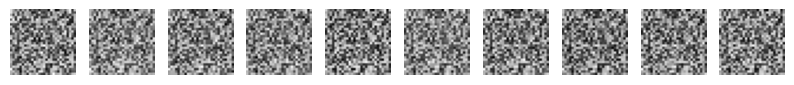

In [5]:
#GAN
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
# Define the generator model
def build_generator(latent_dim):
  model = Sequential()
  model.add(Dense(128, input_dim=latent_dim, activation='relu'))
  model.add(Dense(784, activation='sigmoid'))
  model.add(Reshape((28, 28, 1)))
  return model
# Define the discriminator model
def build_discriminator(input_shape):
  model = Sequential()
  model.add(Flatten(input_shape=input_shape))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model
# Define the GAN model that combines the generator and discriminator
def build_gan(generator, discriminator):
  discriminator.trainable = False
  model = Sequential()
  model.add(generator)
  model.add(discriminator)
  return model
# Load and preprocess the dataset (e.g., MNIST)
from tensorflow.keras.datasets import mnist
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train / 255.0
# Normalize pixel values to the range [0, 1]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
# Set hyperparameters
latent_dim = 100
epochs = 100
batch_size = 64
# Build and compile the generator, discriminator, and GAN models
generator = build_generator(latent_dim)
discriminator = build_discriminator(X_train[0].shape)
gan = build_gan(generator, discriminator)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002,
beta_1=0.5))
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
# Training loop
for epoch in range(epochs):
  idx = np.random.randint(0, X_train.shape[0], batch_size)
  real_images = X_train[idx]
  labels_real = np.ones((batch_size, 1))
  labels_fake = np.zeros((batch_size, 1))
  noise = np.random.normal(0, 1, (batch_size, latent_dim))
  generated_images = generator.predict(noise)
  d_loss_real = discriminator.train_on_batch(real_images, labels_real)
  d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)
  d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
  noise = np.random.normal(0, 1, (batch_size, latent_dim))
  labels_gan = np.ones((batch_size, 1))
  g_loss = gan.train_on_batch(noise, labels_gan)
# Print progress
if (epoch + 1) % 1000 == 0:
  print(f"Epoch {epoch + 1}/{epochs} - D Loss: {d_loss} - G Loss: {g_loss}")
# Save generated images at specified intervals
if (epoch + 1) % 1000 == 0:
  num_samples = 10
  noise = np.random.normal(0, 1, (num_samples, latent_dim))
  generated_images = generator.predict(noise)
  plt.figure(figsize=(10, 2))
  for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.savefig(f"gan_generated_image_epoch_{epoch + 1}.png")
    plt.close()
# Generate and save final images
num_samples = 10
noise = np.random.normal(0, 1, (num_samples, latent_dim))
generated_images = generator.predict(noise)
plt.figure(figsize=(10, 2))
for i in range(num_samples):
  plt.subplot(1, num_samples, i + 1)
  plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
  plt.axis('off')
  plt.savefig("final_generated_images.png")
plt.show()
